## Final Project Submission

Please fill out:
* Student name: Gabriel Blatstein
* Student pace: Part time
* Scheduled project review date/time: 
* Instructor name: Brandon Lewis
* Blog post URL:


# Data Obtaining

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv('kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
print('Water Front:' , df['waterfront'].unique())
print('View:' , df['view'].unique())
print('Bathrooms:' , df['bathrooms'].unique())
print('Bedrooms:' , df['bedrooms'].unique())
print('Condition' , df['condition'].unique())

Water Front: [nan  0.  1.]
View: [ 0. nan  3.  4.  2.  1.]
Bathrooms: [1.   2.25 3.   2.   4.5  1.5  2.5  1.75 2.75 3.25 4.   3.5  0.75 4.75
 5.   4.25 3.75 1.25 5.25 6.   0.5  5.5  6.75 5.75 8.   7.5  7.75 6.25
 6.5 ]
Bedrooms: [ 3  2  4  5  1  6  7  8  9 11 10 33]
Condition [3 5 4 1 2]


In [5]:
df['waterfront']= df['waterfront'].astype(str)


In [6]:
df.describe() #Intial observations:
#Waterfront is a categorical variable coded 0 or 1 for whether or not it has a waterfront
#View is also a categorical variable

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
df.info() #The one variable that jumps out here would be sqft basement, 
#being a object even though all other square foot measurements are integers.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null object
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(7), int64(11), object(3)
memory usage: 3.5+ MB


### Data Cleaning

In [8]:
#Cleaning variables to ensure categorical variables are not taken up as being numerical. Conditions Floors view waterfront

df['condition']= df['condition'].astype("str")
df['view']= df['view'].astype("category")
df['waterfront']= df['waterfront'].astype("category")
df['floors']= df['floors'].astype("category")

#Changing bassement square footage to match data types of other square footages


df['sqft_basement'].replace(to_replace='?', value= 0, inplace=True)
# df[df['sqft_basement']=='?']= '0'
# df['sqft_basement']=df['sqft_basement'].astype('int64')



In [9]:
#Double Check variables got changed

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null category
waterfront       21597 non-null category
view             21534 non-null category
condition        21597 non-null object
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: category(3), float64(5), int64(10), object(3)
memory usage: 3.0

In [10]:
df.isna().sum() #We see here that we will have to take a look at the following variables due to have Null or NaN values.
#In addition we should check to see what variables are categorical vs. quantitative.

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [11]:
for i in df:
    df.replace(np.NaN, 'NaN', inplace=True)

In [12]:
df.isna().sum() #cleaned all data, there are no more NaN's

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

# Exploring Data

In [13]:
# * **id** - unique identified for a house
# * **dateDate** - house was sold
# * **pricePrice** -  is prediction target
# * **bedroomsNumber** -  of Bedrooms/House
# * **bathroomsNumber** -  of bathrooms/bedrooms
# * **sqft_livingsquare** -  footage of the home
# * **sqft_lotsquare** -  footage of the lot
# * **floorsTotal** -  floors (levels) in house
# * **waterfront** - House which has a view to a waterfront
# * **view** - Has been viewed
# * **condition** - How good the condition is ( Overall )
# * **grade** - overall grade given to the housing unit, based on King County grading system
# * **sqft_above** - square footage of house apart from basement
# * **sqft_basement** - square footage of the basement
# * **yr_built** - Built Year
# * **yr_renovated** - Year when house was renovated
# * **zipcode** - zip
# * **lat** - Latitude coordinate
# * **long** - Longitude coordinate
# * **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
# * **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x104665668>,
      dtype=object)

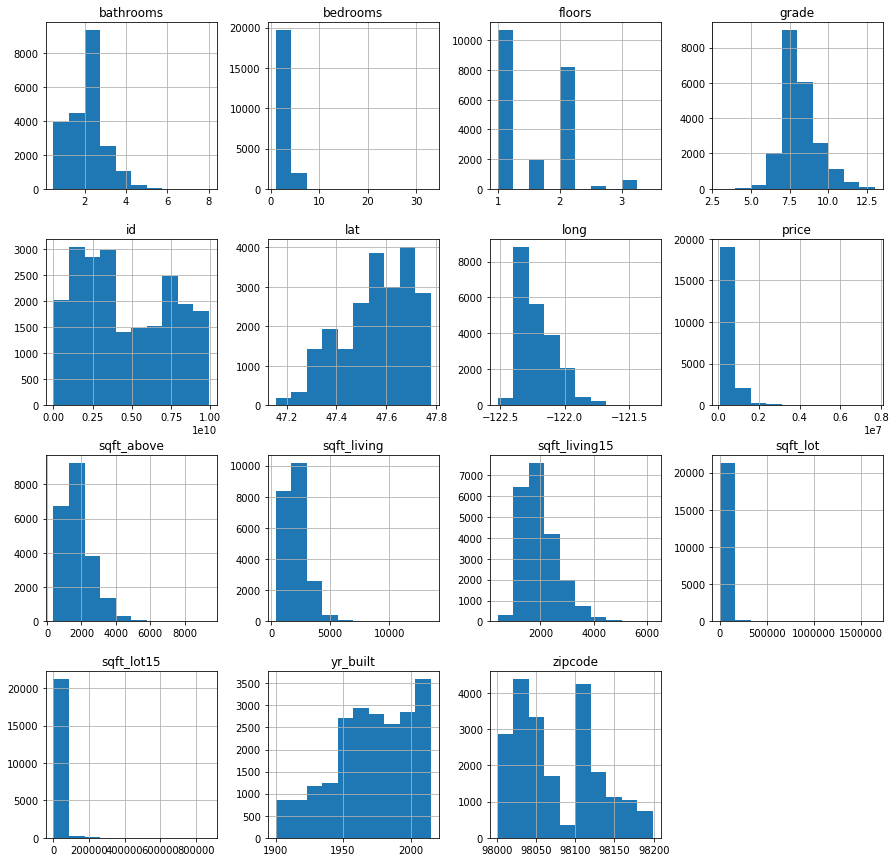

In [14]:
df.hist(figsize=(15,15))

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


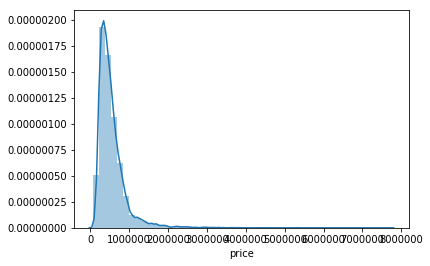

In [15]:
sns.distplot(df['price'])

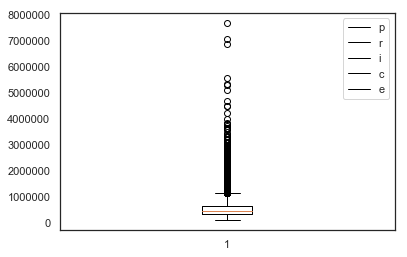

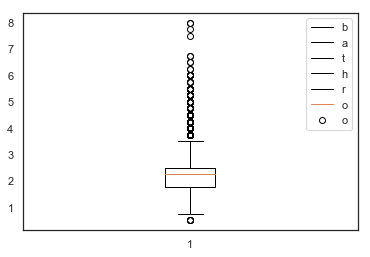

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:449: UserWarning: The handle <matplotlib.lines.Line2D object at 0x1a1c3bf320> has a label of '_' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))


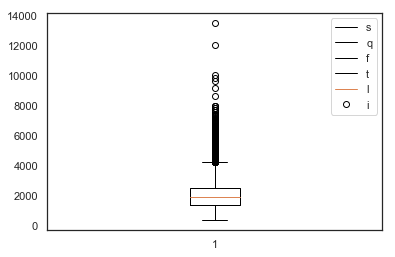

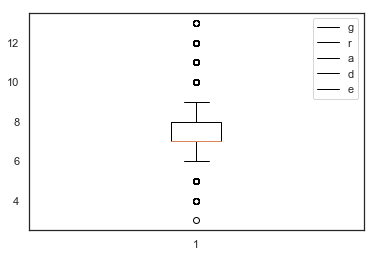

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:449: UserWarning: The handle <matplotlib.lines.Line2D object at 0x1a1c5a19b0> has a label of '_' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))


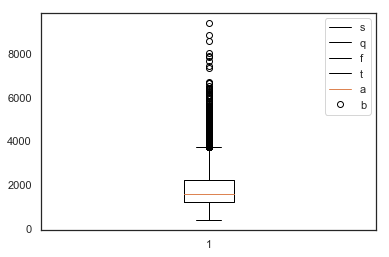

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:449: UserWarning: The handle <matplotlib.lines.Line2D object at 0x1a1c760a90> has a label of '_' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))


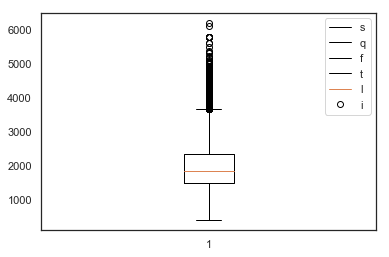

In [35]:
for col in ['price','bathrooms','sqft_living','grade','sqft_above','sqft_living15']:
    plt.boxplot(df[col])
    plt.legend(col)
    plt.show()

## Checking for multicollinearity

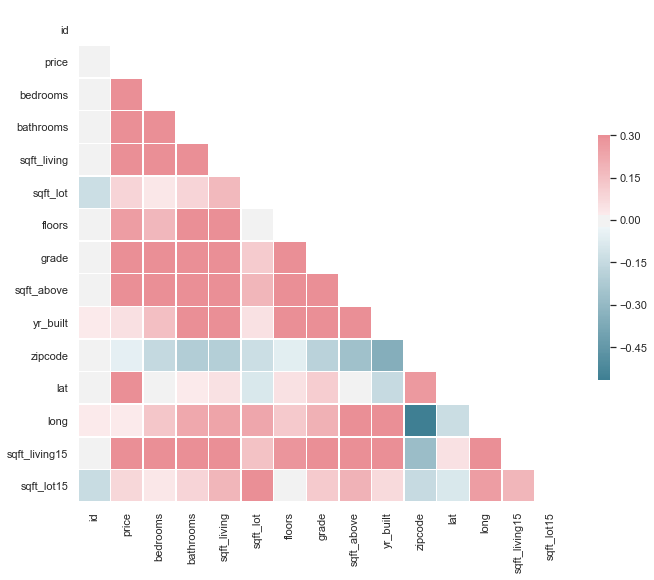

In [16]:
# Set the style of the visualization
sns.set(style="white")

# Create a covariance matrix
corr = df.corr()

# Generate a mask the size of our covariance matrix
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [17]:
#Should drop long variable because it is affecting our other variables negatively. 
df_new = df.drop(['id'], axis=1)
df_new.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,nan,0,3,7,1180,0.0,1955,0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0,3,7,2170,400.0,1951,1991,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0,5,7,1050,910.0,1965,0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0,3,8,1680,0.0,1987,0,98074,47.6168,-122.045,1800,7503


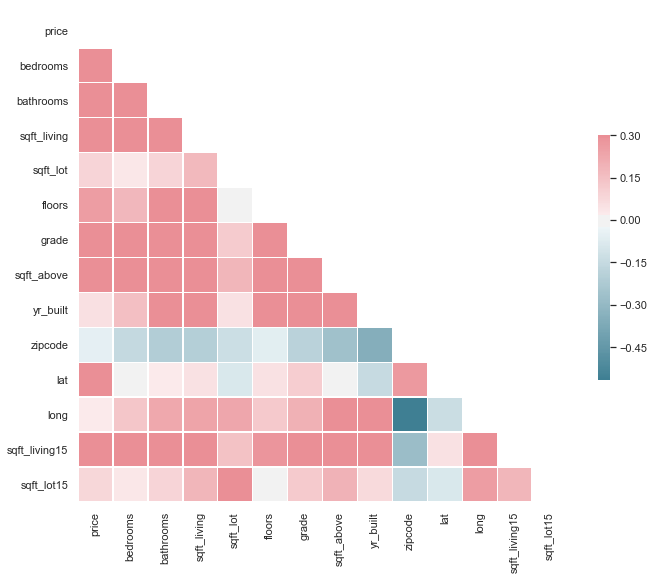

In [18]:
# Set the style of the visualization
sns.set(style="white")

# Create a covariance matrix
corr = df_new.corr()

# Generate a mask the size of our covariance matrix
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


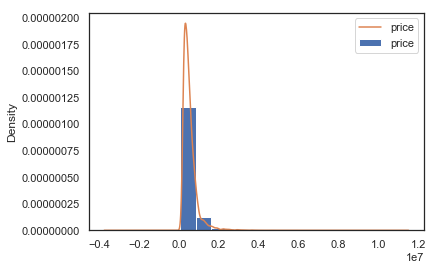

/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


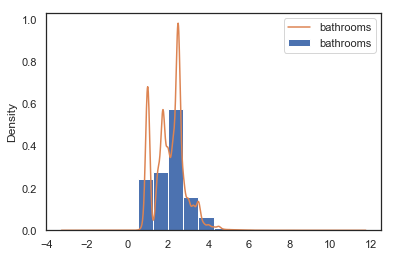

/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


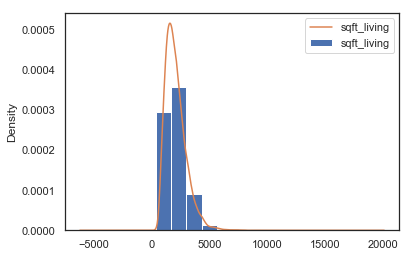

/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


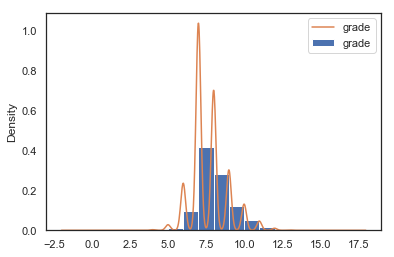

/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


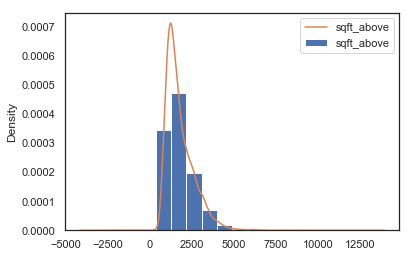

/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


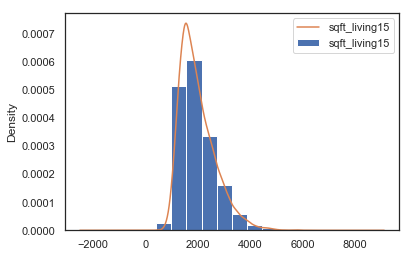

In [19]:
for col in ['price','bathrooms','sqft_living','grade','sqft_above','sqft_living15']:
    df_new[col].plot.hist(normed=True)
    df_new[col].plot.kde(label=col)
    plt.legend()
    plt.show()

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


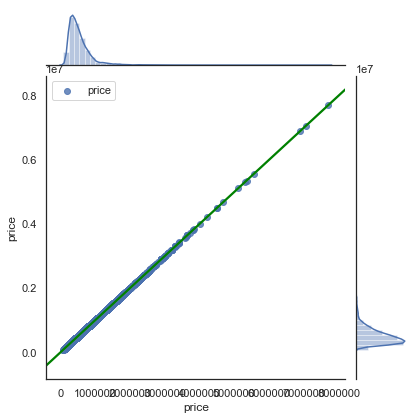

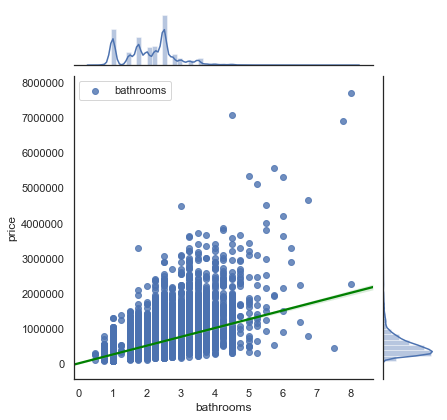

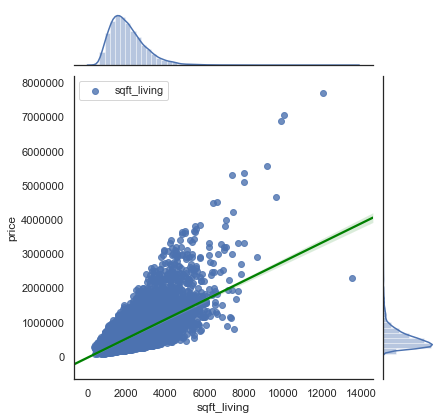

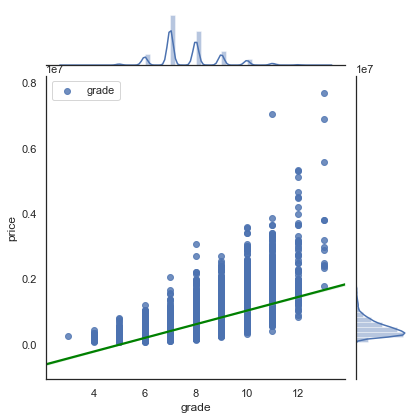

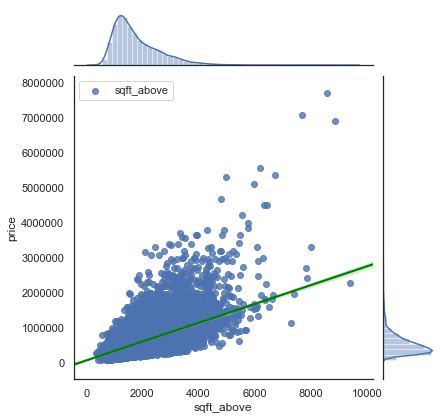

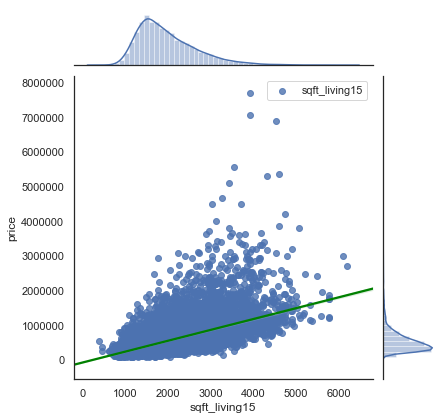

In [20]:
for column in ['price','bathrooms','sqft_living','grade','sqft_above','sqft_living15']:
    sns.jointplot(x=column, y="price",
                  data=df_new, 
                  kind='reg', 
                  label=column,
                  joint_kws={'line_kws':{'color':'green'}})
#     sns.regplot(walmart[column], walmart.Weekly_Sales, label=column)
    plt.legend()
    plt.show()

In [21]:
# df_w_dummies=pd.get_dummies(df_new)
# df_w_dummies.describe()

# Modeling Data

In [22]:
# import statsmodels.formula.api as smf

# col_names = df_new.describe().columns.drop(['price'])
# results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value' ]]
# for idx, val in enumerate(col_names):
#     print ("Housing: price~" + val)
#     print ("------------------------------")

#     f = 'price~' + val
#     model = smf.ols(formula=f, data=df_new).fit()
#     X_new = pd.DataFrame({val: [df_new[val].min(), df_new[val].max()]});
#     preds = model.predict(X_new)
#     results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1] ])
#     print(results[idx+1])

In [23]:
# pd.DataFrame(results)

In [24]:
df_new['price']=np.log(df['price'])



In [25]:
import statsmodels.formula.api as smf

col_names = df_new.describe().columns.drop(['price'])
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value' ]]
for idx, val in enumerate(col_names):
    print ("Housing: price~" + val)
    print ("------------------------------")

    f = 'price~' + val
    model = smf.ols(formula=f, data=df_new).fit()
    X_new = pd.DataFrame({val: [df_new[val].min(), df_new[val].max()]});
    preds = model.predict(X_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1] ])
    print(results[idx+1])


Housing: price~bedrooms
------------------------------
['bedrooms', 0.11789605640983081, 12.389819492476917, 0.1951830466803246, 0.0]
Housing: price~bathrooms
------------------------------
['bathrooms', 0.30387583204123614, 12.249565138197259, 0.3774628447677567, 0.0]
Housing: price~sqft_living
------------------------------
['sqft_living', 0.483282036851469, 12.218777442526854, 0.0003987044116729461, 0.0]
Housing: price~sqft_lot
------------------------------
['sqft_lot', 0.010004940711219712, 13.029007551265554, 1.2717975228721652e-06, 3.804475515223052e-49]
Housing: price~floors
------------------------------
['floors', 0.09649098896318598, 12.595389453014722, 0.3030738098417629, 0.0]
Housing: price~grade
------------------------------
['grade', 0.4952223953087438, 10.629508879817655, 0.3158434011857634, 0.0]
Housing: price~sqft_above
------------------------------
['sqft_above', 0.3618975035607963, 12.36375650693253, 0.00038267675468281644, 0.0]
Housing: price~yr_built
-----------

In [26]:
pd.DataFrame(results)

,0,1,2,3,4
0,ind_var,r_squared,intercept,slope,p-value
1,bedrooms,0.117896,12.3898,0.195183,0
2,bathrooms,0.303876,12.2496,0.377463,0
3,sqft_living,0.483282,12.2188,0.000398704,0
4,sqft_lot,0.0100049,13.029,1.2718e-06,3.80448e-49
5,floors,0.096491,12.5954,0.303074,0
6,grade,0.495222,10.6295,0.315843,0
7,sqft_above,0.361898,12.3638,0.000382677,0
8,yr_built,0.00649366,10.2012,0.00144447,1.88576e-32
9,zipcode,0.00150448,50.4807,-0.000381661,1.18394e-08


In [40]:
# y = df_new[['price']] 'price','bathrooms','sqft_living','grade','sqft_above','sqft_living15'
# X = df_new.drop(['price','date','yr_renovated',''], axis=1)
# X.head()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [51]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
outcome = 'price'
predictors = df_new.drop(['price','date','sqft_basement'], axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum

In [52]:
model = ols(formula= formula, data= df_new).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     592.0
Date:                Tue, 26 Mar 2019   Prob (F-statistic):               0.00
Time:                        22:26:34   Log-Likelihood:                -501.90
No. Observations:               15762   AIC:                             1188.
Df Residuals:                   15670   BIC:                             1893.
Df Model:                          91                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -4.9850      4.315     -1.155      0.248     -13.443       3.473
waterfront[T.1.0]          0.4160      0.029     14.209      0.000       0.359       0.473
view[T.1.0]                0.1816      0.016     11.026      0.000       0.149       0.214
view[T.2.0]                0.1320      0.010     13.005      0.000       0.112       0.152
view[T.3.0]                0.1790      0.014     12.531      0.000       0.151       0.207
view[T.4.0]                0.2148      0.021     10.187      0.000       0.173       0.256
condition[T.2]             0.0050      0.062      0.082      0.935      -0.116       0.126
condition[T.3]             0.1220      0.058      2.110      0.035       0.009       0.235
condition[T.4]             0.1802      0.058      3.117      0.002       0.067       0.293
condition[T.5]             0.2490      0.058      4.286      0.000       0.135       0.363
yr_renovated[T.1934.0]     0.1276      0.251      0.509      0.611      -0.364       0.619
yr_renovated[T.1940.0]    -0.0086      0.177     -0.049      0.961      -0.356       0.339
yr_renovated[T.1944.0]     0.2478      0.251      0.989      0.323      -0.244       0.739
yr_renovated[T.1945.0]    -0.2593      0.177     -1.462      0.144      -0.607       0.088
yr_renovated[T.1946.0]     0.2319      0.251      0.925      0.355      -0.259       0.723
yr_renovated[T.1948.0]     0.1354      0.251      0.540      0.589      -0.356       0.627
yr_renovated[T.1950.0]    -0.3151      0.251     -1.256      0.209      -0.807       0.177
yr_renovated[T.1951.0]     0.0307      0.251      0.123      0.902      -0.461       0.522
yr_renovated[T.1953.0]    -0.2194      0.251     -0.875      0.381      -0.711       0.272
yr_renovated[T.1954.0]     0.7124      0.251      2.842      0.004       0.221       1.204
yr_renovated[T.1955.0]     0.0607      0.177      0.343      0.732      -0.287       0.408
yr_renovated[T.1956.0]    -0.2303      0.145     -1.588      0.112      -0.514       0.054
yr_renovated[T.1957.0]    -0.2168      0.177     -1.223      0.221      -0.564       0.131
yr_renovated[T.1958.0]     0.0762      0.145      0.526      0.599      -0.208       0.360
yr_renovated[T.1959.0]    -0.0803      0.251     -0.320      0.749      -0.572       0.411
yr_renovated[T.1960.0]    -0.4182      0.145     -2.886      0.004      -0.702      -0.134
yr_renovated[T.1962.0]     0.2186      0.251      0.871      0.384      -0.273       0.711
yr_renovated[T.1963.0]    -0.1375      0.145     -0.949      0.343      -0.422       0.147
yr_renovated[T.1964.0]    -0.1481      0.112     -1.320      0.187      -0.368       0.072
yr_renovated[T.1965.0]     0.1617      0.145      1.115      0.265      -0.123       0.446
yr_renovated[T.1967.0]    -0.2717      0.251     -1.084      0.278      -0.763  

In [ ]:
b
# Your code here - remember to use markdown cells for comments as well!

# Interpretation of Data